In [ ]:
'''
    Multi Linear Regression -->

    Multiple linear regression is a statistical technique used to model
    the relationship between one dependent variable and two or more independent
    variables. It generalizes simple linear regression by allowing for multiple
    factors that could predict the outcome.

    Equation -->
    Y = β0 + β1X1 +β2X2 + ⋯ + βnXn + ϵ

    Where,
    Y = Predicted value (dependent variable)
    X1, X2,.. Xn = features (independent values)
    β0 = Intercept
    β1X1 +β2X2 + ⋯ + βnXn = Coefficients
    ϵ = Error term 
'''

In [ ]:
'''
    P Value -->

    The p-value is a statistical measure used to determine the significance
    of a result in hypothesis testing. In the context of regression models,
    it helps you understand whether the relationship between the dependent
    and independent variables is statistically significant.
'''

In [ ]:
'''
    Methods for building model -->

    All in
    Backward Elimination
    Forward Selection
    Bi-Directional Elimination
    Score Comparision
'''

In [ ]:
'''
    All In -->

    Definition: This method includes all the available features in the model
    without performing any feature selection. The idea is to fit the
    regression model with all independent variables (predictors).

    Use Case: Useful when you are confident that all features are relevant
    or when there is no clear idea of which features should be excluded.

    Pros: Simple and straightforward.

    Cons: May include irrelevant or redundant features, which can reduce
    model performance or cause overfitting.
'''

In [ ]:
'''  
    Backward Elimination -->

    Definition: Backward Elimination starts by fitting the model with all
    features and iteratively removes the least significant feature
    (based on p-values) one at a time. This process continues until all
    remaining features are statistically significant.

    Steps:
    Fit the model with all features.
    Remove the feature with the highest p-value (above a significance 
    threshold, usually 0.05).
    Refit the model and repeat until all p-values are below the threshold.
   
    Pros: Helps in reducing the complexity of the model by removing
    non-significant features.

    Cons: May remove some features that, when combined with others,
    could improve the model.
'''

In [ ]:
'''
    Forward Selection -->

    Definition: Forward Selection begins with an empty model (no features)
    and adds the most statistically significant feature at each step.
    The process continues until adding more features does not significantly
    improve the model.

    Steps:
    Start with no features.
    Add the feature with the lowest p-value (or highest R-squared increase).
    Repeat until adding further features does not significantly improve the model.

    Pros: Builds the model step by step, allowing you to add only the most
    relevant features.

    Cons: Can miss combinations of features that, when included together,
    may be significant.
'''

In [ ]:
'''
    Bi-Directional Elimination (Stepwise Regression) -->

    Definition: Bi-Directional Elimination combines the processes of
    Backward Elimination and Forward Selection. At each step, features
    are added or removed based on their significance, allowing for both
    directions of feature selection.

    Steps:
    Start with no features or a few selected ones.
    Perform Forward Selection by adding significant features.
    After adding a feature, perform Backward Elimination to see if any
    of the added features become insignificant and need removal.
    Continue this process until no further improvements can be made by
    adding or removing features.

    Pros: Flexible, as it allows for adding and removing features dynamically.

    Cons: Computationally intensive, especially for large datasets.
'''

In [ ]:
'''
    Score Comparison (e.g., AIC/BIC) -->

    Definition: This method selects features based on a specific criterion,
    such as Akaike Information Criterion (AIC) or Bayesian Information Criterion
    (BIC). The model with the lowest AIC/BIC score is considered the best.
    It balances model complexity (the number of parameters) and the goodness-of-fit.

    AIC/BIC Formula: These scores penalize models with more features,
    encouraging a balance between simplicity and accuracy:

    AIC = 2k - 2ln(L)
    BIC = ln(n)k - 2ln(L)

    Where,

    k = number of parameters
    L = likelihood of the model
    n = number of data points

    Pros: Provides a trade-off between model complexity and accuracy,
    avoiding overfitting.

    Cons: May not be intuitive to interpret compared to p-values and R-squared.
'''

In [9]:
#   Importing Libraries -->

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [10]:
#   Importing Dataset -->

data = pd.read_csv('Data/50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [11]:
#   Seperating Target From Features -->

X_data = data.iloc[:, :-1].values
y_data = data.iloc[:, -1].values

In [12]:
X_data

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [13]:
#   Encoding Categorical Data -->

clt = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X_data = np.array(clt.fit_transform(X_data))

In [14]:
X_data

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [15]:
#   Splitting The Data -->

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [16]:
#   Building Model -->

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
#   Predicting Values -->

y_pred = model.predict(X_test)
np.set_printoptions(precision=2) #  To display numeric values upto 2 decimal points
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[126362.88 134307.35]
 [ 84608.45  81005.76]
 [ 99677.49  99937.59]
 [ 46357.46  64926.08]
 [128750.48 125370.37]
 [ 50912.42  35673.41]
 [109741.35 105733.54]
 [100643.24 107404.34]
 [ 97599.28  97427.84]
 [113097.43 122776.86]]


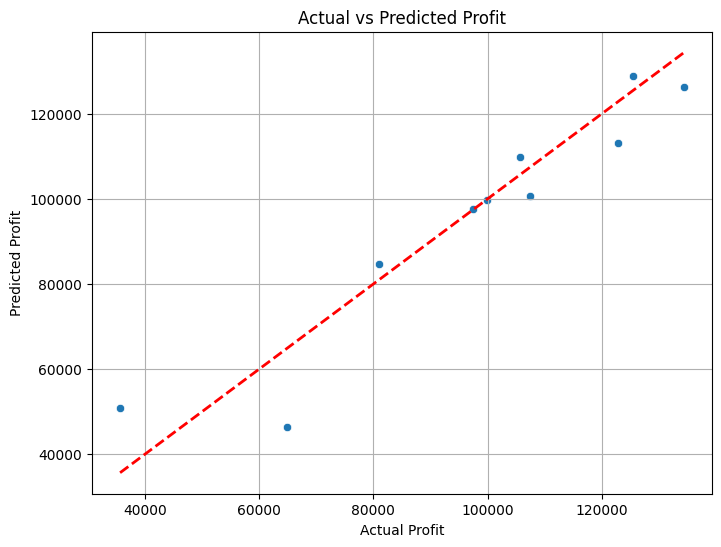

In [18]:
# Plotting the actual vs predicted values

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)  # Scatter plot of actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Identity line (perfect prediction)
plt.title("Actual vs Predicted Profit")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.grid(True)
plt.show()